Final loss using Gradient Descent: 0.0033230699894622904
Final loss using Stochastic Gradient Descent: 0.46217830527744547
Final loss using Mini-Batch Gradient Descent: 0.0038496304340175616


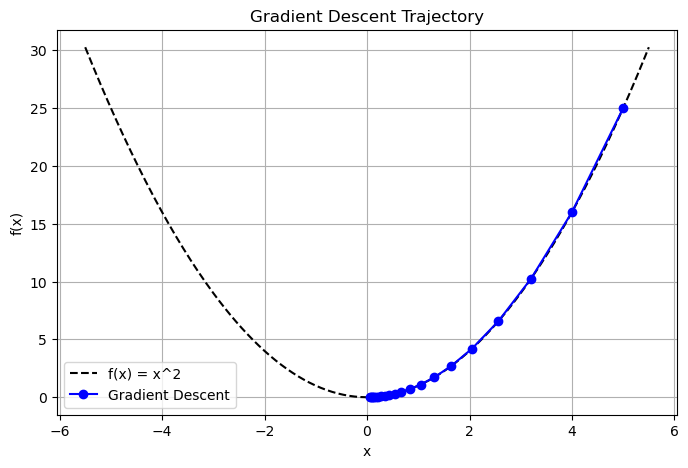

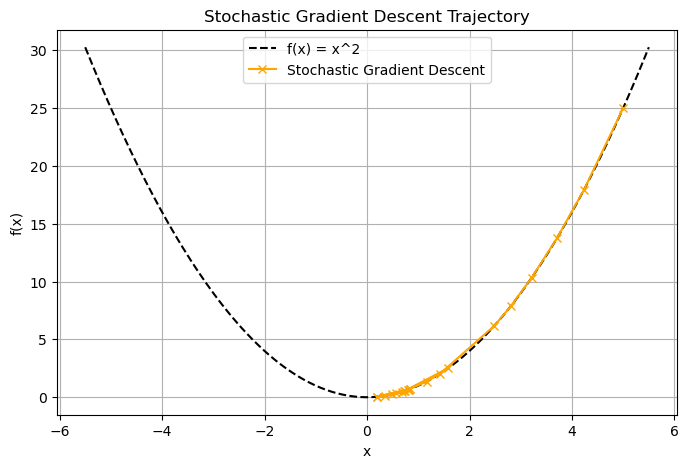

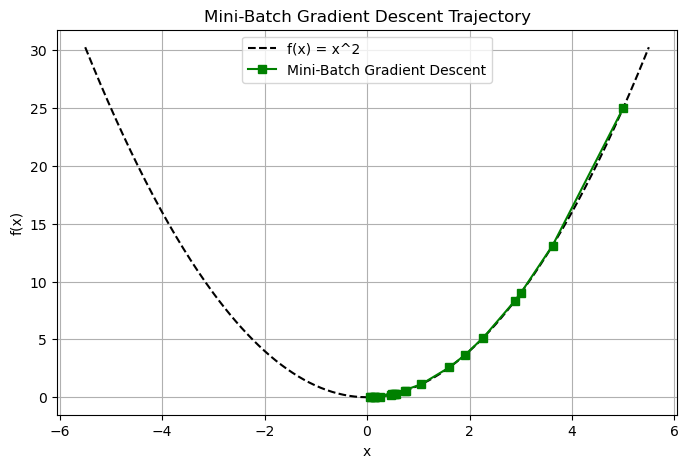

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function and gradient definition
def f(x):
    return x**2

def grad_f(x):
    return 2 * x

# Gradient Descent (GD)
def gradient_descent(x0, learning_rate, steps):
    x_vals = [x0]
    for _ in range(steps):
        x0 = x0 - learning_rate * grad_f(x0)
        x_vals.append(x0)
    return x_vals

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(x0, learning_rate, steps, noise_factor=7):
    x_vals = [x0]
    for _ in range(steps):
        gradient = grad_f(x0) + np.random.uniform(-noise_factor, noise_factor)  # Add noise
        x0 = x0 - learning_rate * gradient
        x_vals.append(x0)
    return x_vals

# Mini-Batch Gradient Descent (MBGD)
def mini_batch_gradient_descent(x0, learning_rate, steps, noise_factor=5, batch_size=5):
    x_vals = [x0]
    for _ in range(steps):
        gradient = grad_f(x0) + np.random.uniform(-noise_factor, noise_factor)  # Simulate mini-batch noise
        x0 = x0 - learning_rate * gradient
        x_vals.append(x0)
    return x_vals

# Parameters
x0 = 5  # Initial value
learning_rate = 0.1
steps = 20

# Trajectories
gd_trajectory = gradient_descent(x0, learning_rate, steps)
sgd_trajectory = stochastic_gradient_descent(x0, learning_rate, steps)
mbgd_trajectory = mini_batch_gradient_descent(x0, learning_rate, steps)

# Compute final loss values
gd_final_loss = f(gd_trajectory[-1])
sgd_final_loss = f(sgd_trajectory[-1])
mbgd_final_loss = f(mbgd_trajectory[-1])

print(f"Final loss using Gradient Descent: {gd_final_loss}")
print(f"Final loss using Stochastic Gradient Descent: {sgd_final_loss}")
print(f"Final loss using Mini-Batch Gradient Descent: {mbgd_final_loss}")

# Plotting each trajectory
x_range = np.linspace(-5.5, 5.5, 300)

# Gradient Descent Plot
plt.figure(figsize=(8, 5))
plt.plot(x_range, f(x_range), label="f(x) = x^2", color="black", linestyle="--")
plt.plot(gd_trajectory, f(np.array(gd_trajectory)), marker="o", label="Gradient Descent", color="blue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Trajectory")
plt.legend()
plt.grid()
plt.show()

# Stochastic Gradient Descent Plot
plt.figure(figsize=(8, 5))
plt.plot(x_range, f(x_range), label="f(x) = x^2", color="black", linestyle="--")
plt.plot(sgd_trajectory, f(np.array(sgd_trajectory)), marker="x", label="Stochastic Gradient Descent", color="orange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Stochastic Gradient Descent Trajectory")
plt.legend()
plt.grid()
plt.show()

# Mini-Batch Gradient Descent Plot
plt.figure(figsize=(8, 5))
plt.plot(x_range, f(x_range), label="f(x) = x^2", color="black", linestyle="--")
plt.plot(mbgd_trajectory, f(np.array(mbgd_trajectory)), marker="s", label="Mini-Batch Gradient Descent", color="green")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Mini-Batch Gradient Descent Trajectory")
plt.legend()
plt.grid()
plt.show()


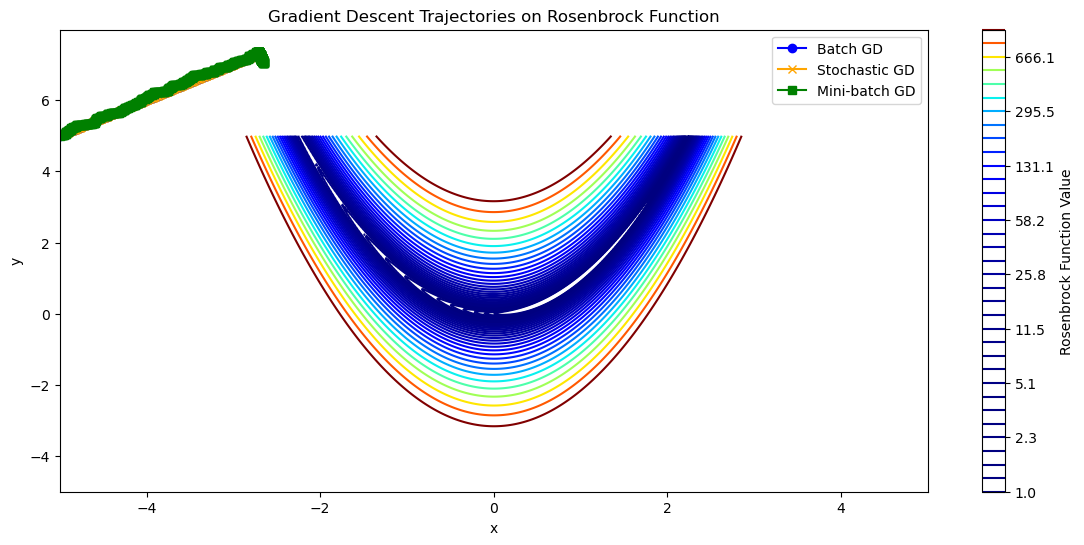

Final Loss Values:
Batch GD Loss: 13.731096924936116
Stochastic GD Loss: 13.732242408623385
Mini-batch GD Loss: 13.496669889214076


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function and its gradient
def rosenbrock(x, y):
    """Rosenbrock function."""
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(x, y):
    """Gradient of the Rosenbrock function."""
    grad_x = -2 * (1 - x) - 400 * x * (y - x**2)
    grad_y = 200 * (y - x**2)
    return np.array([grad_x, grad_y], dtype=np.float64)

# Gradient Descent Implementation
def gradient_descent(grad_func, lr, epochs, init_point, method="batch", batch_size=1):
    x, y = init_point
    trajectory = [(x, y)]
    for epoch in range(epochs):
        grad = grad_func(x, y)
        
        if method == "stochastic":
            # Add noise to simulate stochastic updates
            grad += np.random.normal(0, 0.1, size=grad.shape)
        
        elif method == "mini-batch":
            # Simulate mini-batch by partially applying gradients
            batch_indices = np.random.choice(len(grad), size=batch_size, replace=False)
            mini_grad = np.zeros_like(grad)
            mini_grad[batch_indices] = grad[batch_indices]
            grad = mini_grad
        
        # Clip gradients to prevent exploding gradients
        grad = np.clip(grad, -10, 10)
        
        # Update parameters
        x -= lr * grad[0]
        y -= lr * grad[1]
        trajectory.append((x, y))
    
    return np.array(trajectory)

# Parameters
learning_rate = 0.001  # Smaller learning rate for stability
epochs = 1000
init_point = (-5, 5)  # Starting point

# Run Gradient Descent Variants
batch_trajectory = gradient_descent(rosenbrock_grad, learning_rate, epochs, init_point, method="batch")
sgd_trajectory = gradient_descent(rosenbrock_grad, learning_rate, epochs, init_point, method="stochastic")
mini_batch_trajectory = gradient_descent(rosenbrock_grad, learning_rate, epochs, init_point, method="mini-batch", batch_size=1)

# Compute final losses
batch_loss = rosenbrock(batch_trajectory[-1, 0], batch_trajectory[-1, 1])
sgd_loss = rosenbrock(sgd_trajectory[-1, 0], sgd_trajectory[-1, 1])
mini_batch_loss = rosenbrock(mini_batch_trajectory[-1, 0], mini_batch_trajectory[-1, 1])

# Visualization
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(14, 6))
plt.contour(X, Y, Z, levels=np.logspace(0, 3, 35), cmap='jet')
plt.plot(batch_trajectory[:, 0], batch_trajectory[:, 1], '-o', label="Batch GD", color="blue")
plt.plot(sgd_trajectory[:, 0], sgd_trajectory[:, 1], '-x', label="Stochastic GD", color="orange")
plt.plot(mini_batch_trajectory[:, 0], mini_batch_trajectory[:, 1], '-s', label="Mini-batch GD", color="green")
plt.title("Gradient Descent Trajectories on Rosenbrock Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.colorbar(label="Rosenbrock Function Value")
plt.show()

# Print final losses
print("Final Loss Values:")
print(f"Batch GD Loss: {batch_loss}")
print(f"Stochastic GD Loss: {sgd_loss}")
print(f"Mini-batch GD Loss: {mini_batch_loss}")


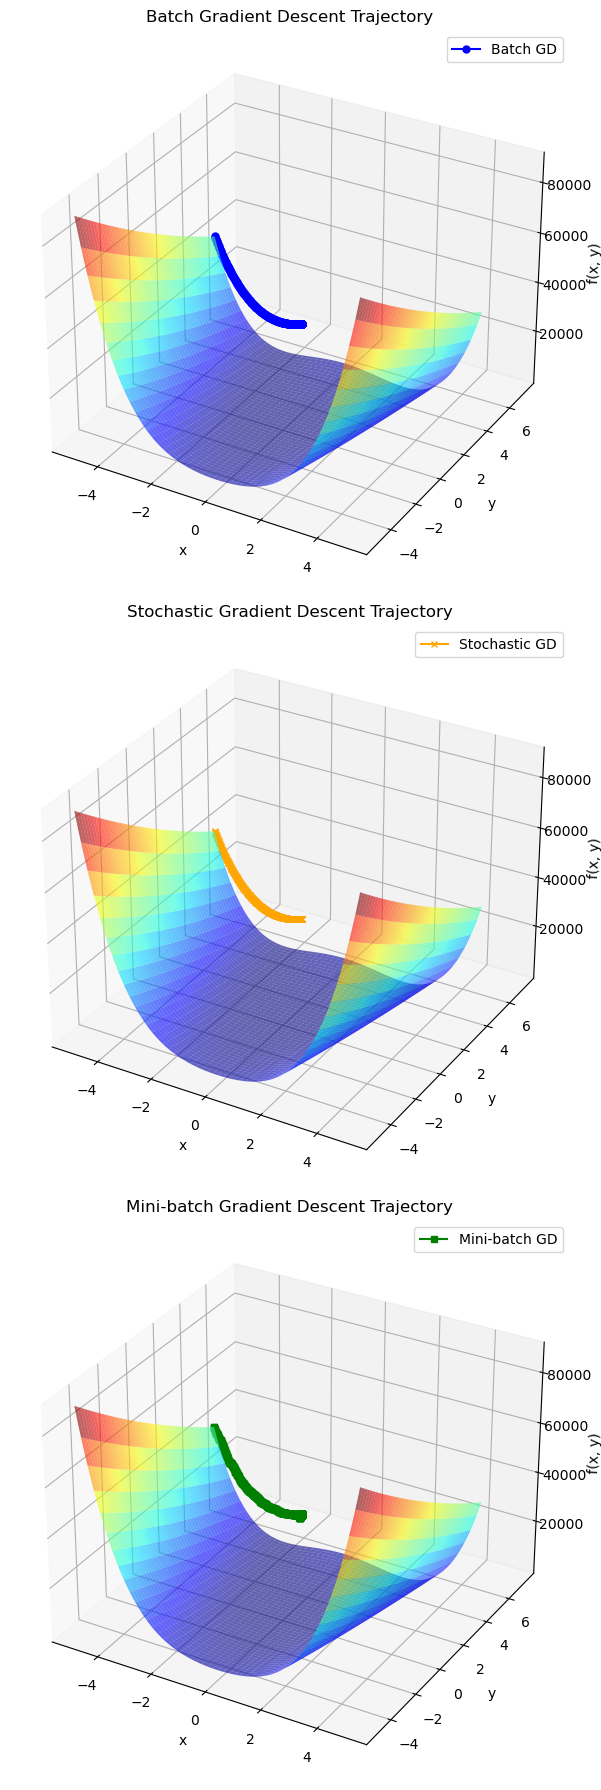

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization of the Rosenbrock function
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Plot each trajectory separately in 3D
fig = plt.figure(figsize=(18, 18))

# Batch GD
ax1 = fig.add_subplot(311, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.6)
ax1.plot(batch_trajectory[:, 0], batch_trajectory[:, 1], rosenbrock(batch_trajectory[:, 0], batch_trajectory[:, 1]),
         '-o', color='blue', label='Batch GD', markersize=5)
ax1.set_title('Batch Gradient Descent Trajectory')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.legend()

# Stochastic GD
ax2 = fig.add_subplot(312, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='jet', alpha=0.6)
ax2.plot(sgd_trajectory[:, 0], sgd_trajectory[:, 1], rosenbrock(sgd_trajectory[:, 0], sgd_trajectory[:, 1]),
         '-x', color='orange', label='Stochastic GD', markersize=5)
ax2.set_title('Stochastic Gradient Descent Trajectory')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')
ax2.legend()

# Mini-batch GD
ax3 = fig.add_subplot(313, projection='3d')
ax3.plot_surface(X, Y, Z, cmap='jet', alpha=0.6)
ax3.plot(mini_batch_trajectory[:, 0], mini_batch_trajectory[:, 1],
         rosenbrock(mini_batch_trajectory[:, 0], mini_batch_trajectory[:, 1]),
         '-s', color='green', label='Mini-batch GD', markersize=5)
ax3.set_title('Mini-batch Gradient Descent Trajectory')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('f(x, y)')
ax3.legend()

plt.tight_layout()
plt.show()

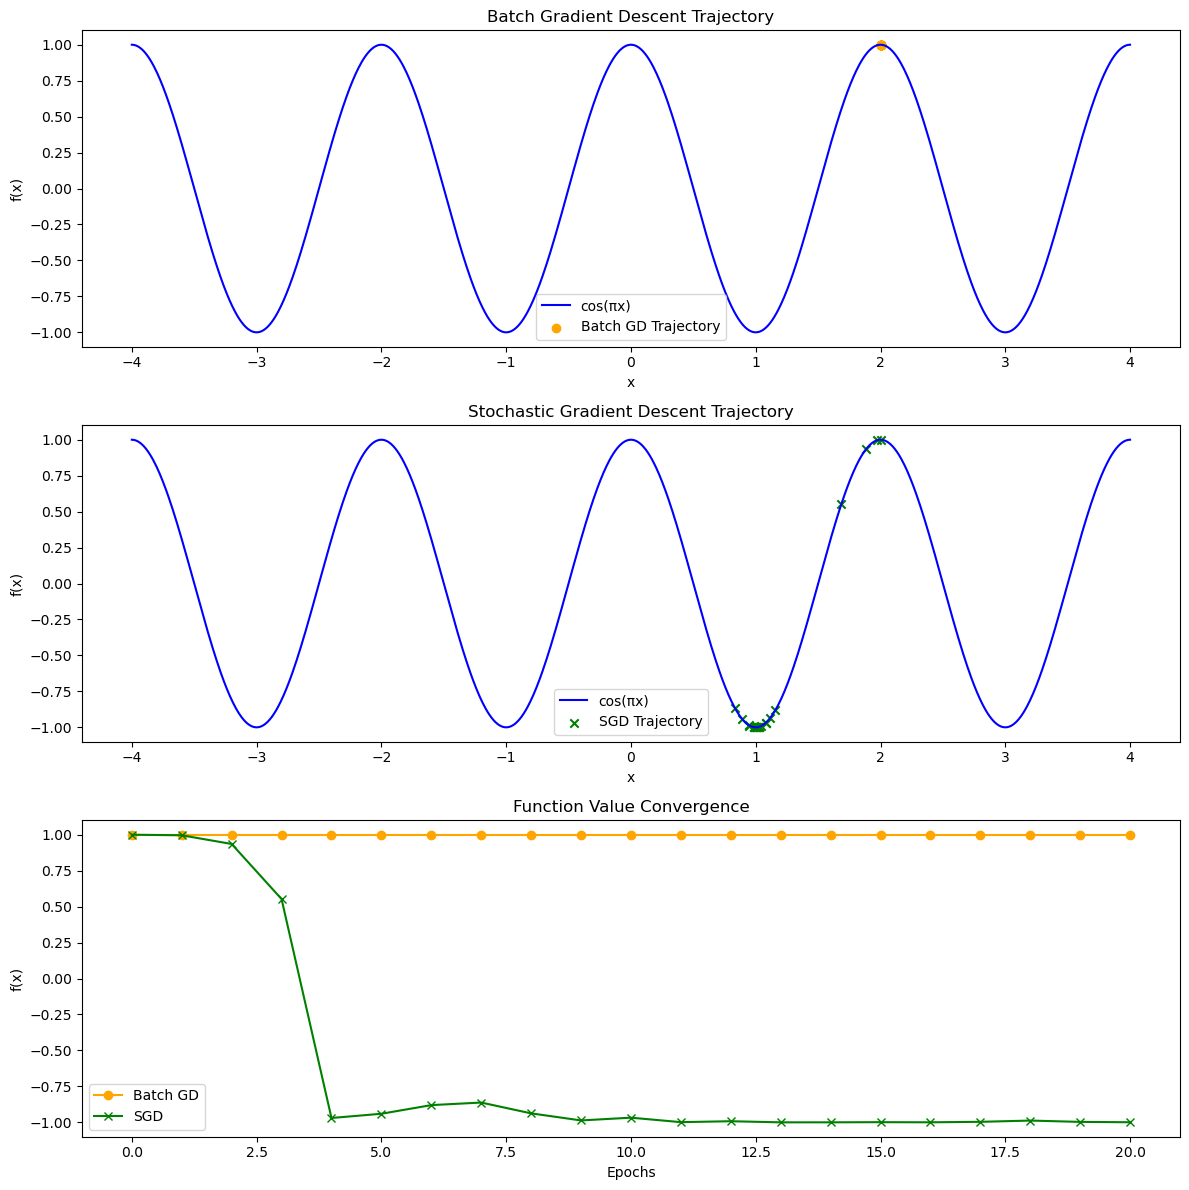

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return np.cos(np.pi * x)

def df(x):
    return -np.pi * np.sin(np.pi * x)

# Gradient Descent Implementation
def gradient_descent_visual(grad_func, x_init, lr, epochs, method="batch"):
    x = x_init
    trajectory = [x]
    function_values = [f(x)]

    for epoch in range(epochs):
        grad = grad_func(x)
        if method == "stochastic":
            grad += np.random.normal(0, 0.2)  # Adding noise to simulate stochastic updates
        x -= lr * grad
        trajectory.append(x)
        function_values.append(f(x))

    return np.array(trajectory), np.array(function_values)

# Parameters
x_init = 2.0  # Starting point
learning_rate = 0.2  # Learning rate for visible jumps
epochs = 20  # Number of iterations

# Perform Gradient Descent for Batch GD and SGD
batch_traj, batch_vals = gradient_descent_visual(df, x_init, learning_rate, epochs, method="batch")
sgd_traj, sgd_vals = gradient_descent_visual(df, x_init, learning_rate, epochs, method="stochastic")

# Plotting the Results in Separate Graphs
x_range = np.linspace(-4, 4, 1000)  # For plotting the function

plt.figure(figsize=(12, 12))

# Batch GD Convergence
plt.subplot(3, 1, 1)
plt.plot(x_range, f(x_range), label="cos(πx)", color="blue")
plt.scatter(batch_traj, f(batch_traj), color="orange", label="Batch GD Trajectory", marker='o')
plt.title("Batch Gradient Descent Trajectory")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# SGD Convergence
plt.subplot(3, 1, 2)
plt.plot(x_range, f(x_range), label="cos(πx)", color="blue")
plt.scatter(sgd_traj, f(sgd_traj), color="green", label="SGD Trajectory", marker='x')
plt.title("Stochastic Gradient Descent Trajectory")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Function Value Convergence (Combined)
plt.subplot(3, 1, 3)
plt.plot(range(epochs + 1), batch_vals, label="Batch GD", color="orange", marker='o')
plt.plot(range(epochs + 1), sgd_vals, label="SGD", color="green", marker='x')
plt.title("Function Value Convergence")
plt.xlabel("Epochs")
plt.ylabel("f(x)")
plt.legend()

plt.tight_layout()
plt.show()


Final loss using Gradient Descent: -1.0
Final loss using Stochastic Gradient Descent: -0.9999636650806163
Final loss using Mini-Batch Gradient Descent: -1.0


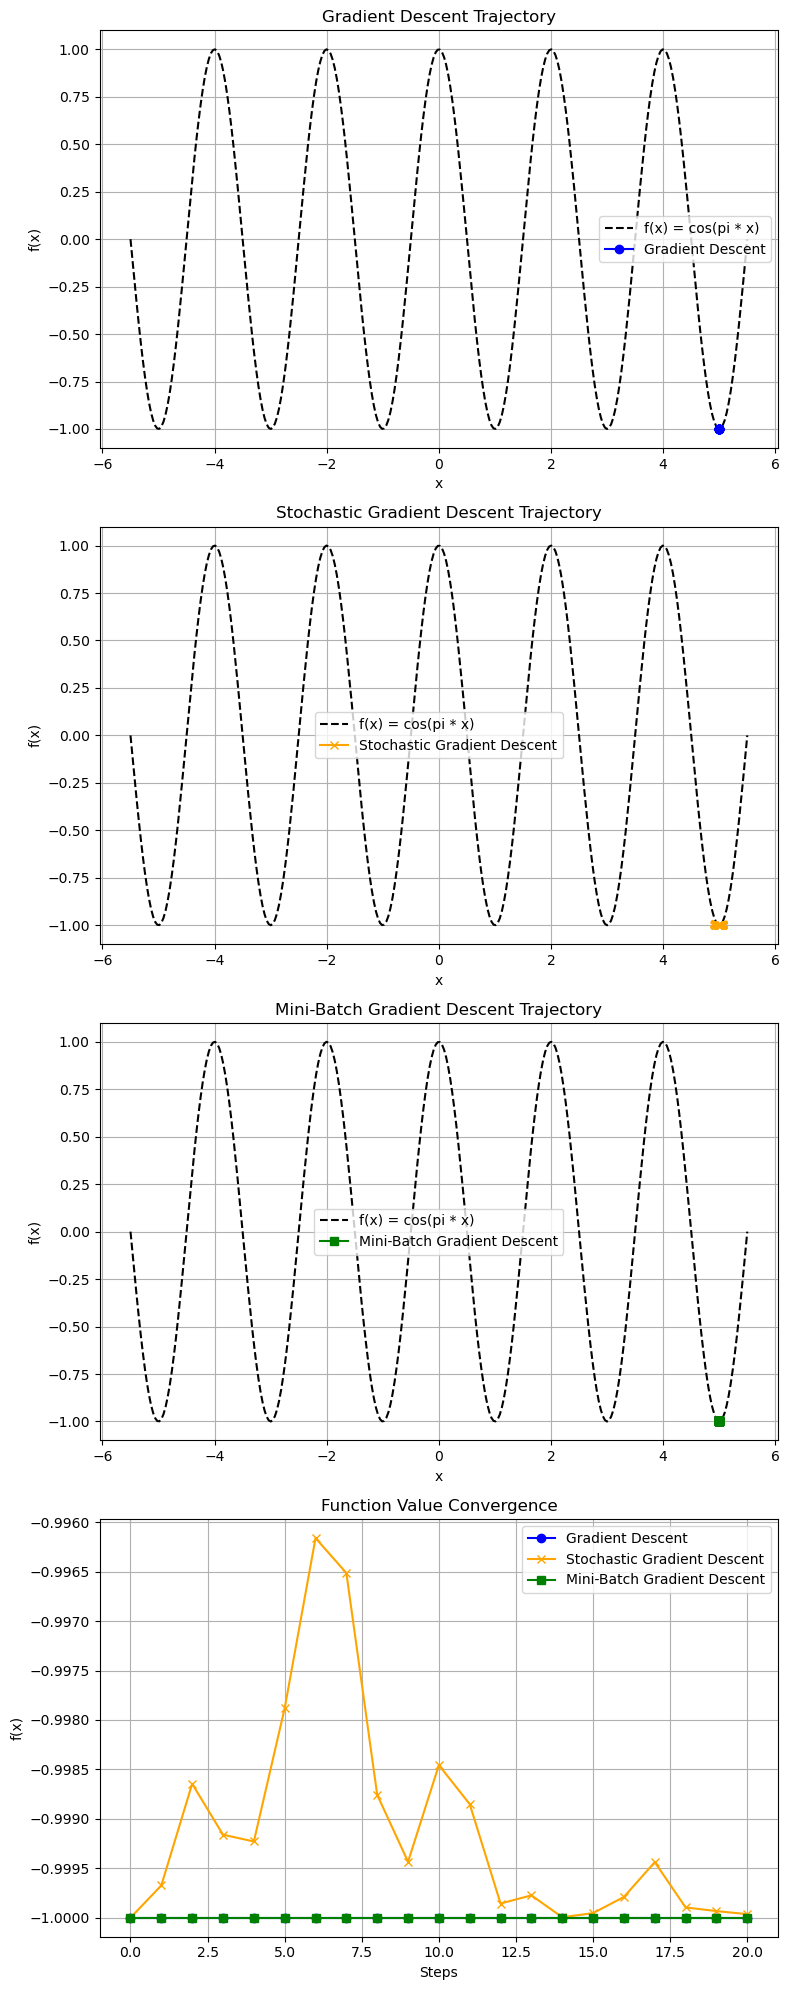

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Function and gradient definition
def f(x):
    return np.cos(np.pi * x)

def df(x):
    return -2 * np.pi * np.sin(np.pi * x)

# Gradient Descent (GD)
def gradient_descent(x0, learning_rate, steps):
    x_vals = [x0]
    for _ in range(steps):
        x0 = x0 - learning_rate * df(x0)
        x_vals.append(x0)
    return x_vals

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(x0, learning_rate, steps, noise_factor=0.1):
    x_vals = [x0]
    for _ in range(steps):
        gradient = df(x0) + np.random.uniform(-noise_factor, noise_factor)  # Add noise
        x0 = x0 - learning_rate * gradient
        x_vals.append(x0)
    return x_vals

# Mini-Batch Gradient Descent (MBGD)
def mini_batch_gradient_descent(x0, learning_rate, steps):
    x_vals = [x0]
    for _ in range(steps):
        gradient = df(x0)
        x0 = x0 - learning_rate * gradient
        x_vals.append(x0)
    return x_vals

# Parameters
x0 = 5  # Initial value
learning_rate = 0.1
steps = 20

# Trajectories
gd_trajectory = gradient_descent(x0, learning_rate, steps)
sgd_trajectory = stochastic_gradient_descent(x0, learning_rate, steps)
mbgd_trajectory = mini_batch_gradient_descent(x0, learning_rate, steps)

# Compute final loss values
gd_final_loss = f(gd_trajectory[-1])
sgd_final_loss = f(sgd_trajectory[-1])
mbgd_final_loss = f(mbgd_trajectory[-1])

print(f"Final loss using Gradient Descent: {gd_final_loss}")
print(f"Final loss using Stochastic Gradient Descent: {sgd_final_loss}")
print(f"Final loss using Mini-Batch Gradient Descent: {mbgd_final_loss}")

# Plotting the function and convergence trajectories
x_range = np.linspace(-5.5, 5.5, 300)
y_range = f(x_range)

fig, axs = plt.subplots(4, 1, figsize=(8, 20))

# Gradient Descent Plot
axs[0].plot(x_range, y_range, label="f(x) = cos(pi * x)", color="black", linestyle="--")
axs[0].plot(gd_trajectory, f(np.array(gd_trajectory)), marker="o", label="Gradient Descent", color="blue")
for i in range(len(gd_trajectory) - 1):
    axs[0].annotate('', xy=(gd_trajectory[i + 1], f(gd_trajectory[i + 1])),
                    xytext=(gd_trajectory[i], f(gd_trajectory[i])),
                    arrowprops=dict(arrowstyle='->', color='blue', lw=1.5))
axs[0].set_title("Gradient Descent Trajectory")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].legend()
axs[0].grid()

# Stochastic Gradient Descent Plot
axs[1].plot(x_range, y_range, label="f(x) = cos(pi * x)", color="black", linestyle="--")
axs[1].plot(sgd_trajectory, f(np.array(sgd_trajectory)), marker="x", label="Stochastic Gradient Descent", color="orange")
for i in range(len(sgd_trajectory) - 1):
    axs[1].annotate('', xy=(sgd_trajectory[i + 1], f(sgd_trajectory[i + 1])),
                    xytext=(sgd_trajectory[i], f(sgd_trajectory[i])),
                    arrowprops=dict(arrowstyle='->', color='orange', lw=1.5))
axs[1].set_title("Stochastic Gradient Descent Trajectory")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].legend()
axs[1].grid()

# Mini-Batch Gradient Descent Plot
axs[2].plot(x_range, y_range, label="f(x) = cos(pi * x)", color="black", linestyle="--")
axs[2].plot(mbgd_trajectory, f(np.array(mbgd_trajectory)), marker="s", label="Mini-Batch Gradient Descent", color="green")
for i in range(len(mbgd_trajectory) - 1):
    axs[2].annotate('', xy=(mbgd_trajectory[i + 1], f(mbgd_trajectory[i + 1])),
                    xytext=(mbgd_trajectory[i], f(mbgd_trajectory[i])),
                    arrowprops=dict(arrowstyle='->', color='green', lw=1.5))
axs[2].set_title("Mini-Batch Gradient Descent Trajectory")
axs[2].set_xlabel("x")
axs[2].set_ylabel("f(x)")
axs[2].legend()
axs[2].grid()

# Combined Function Value Convergence
axs[3].plot(range(steps + 1), f(np.array(gd_trajectory)), label="Gradient Descent", color="blue", marker="o")
axs[3].plot(range(steps + 1), f(np.array(sgd_trajectory)), label="Stochastic Gradient Descent", color="orange", marker="x")
axs[3].plot(range(steps + 1), f(np.array(mbgd_trajectory)), label="Mini-Batch Gradient Descent", color="green", marker="s")
axs[3].set_title("Function Value Convergence")
axs[3].set_xlabel("Steps")
axs[3].set_ylabel("f(x)")
axs[3].legend()
axs[3].grid()

plt.tight_layout()
plt.show()
